In [2]:
import json
import os 
import scipy.io
import random
from sklearn.preprocessing import MinMaxScaler # normalize the x,y coordinates
import networkx as nx # for graph
import matplotlib.pyplot as plt
import numpy as np
from generate_graphs import graph_sequence, load_file
from helper_funcs import evaluate_frame, adjacency_matrix
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

Define the nodes for the poses

Confirm the connections between the nodes<br>
Is it a fully connected graph or a disconnected graph?<br>

In [2]:
graph = dict() # initialize graph

points = []
# read the landmarks.m file
with open('landmarks\horse\landmarks.m', 'r') as f:
    for i in f:
        split_result = i.split(' = ')
        if len(split_result) >= 2:
            # print(split_result[1].split(';')[0])
            points.append(split_result[1].split(';')[0].split("'")[1])

# add points to graph
graph['chin'] = ['leftEye', 'rightEye', 'neck']
graph['rightEye'] = ['chin', 'leftEye', 'neck']
graph['leftEye'] = ['chin', 'rightEye', 'neck']
graph['neck'] = ['chin', 'leftEye', 'rightEye', 'leftShoulder', 'rightShoulder']
graph['leftShoulder'] = ['neck', 'frontLeftHip', 'tailStart']
graph['rightShoulder'] = ['neck', 'frontRightHip', 'tailStart']
graph['frontLeftHip'] = ['leftShoulder', 'frontLeftKnee']
graph['frontRightHip'] = ['rightShoulder', 'frontRightKnee']
graph['frontLeftKnee'] = ['frontLeftHip', 'frontLeftHoof']
graph['frontRightKnee'] = ['frontRightHip', 'frontRightHoof']
graph['frontLeftHoof'] = ['frontLeftKnee']
graph['frontRightHoof'] = ['frontRightKnee']
graph['tailStart'] = ['leftShoulder', 'rightShoulder', 'backLeftHip', 'backRightHip']
graph['backLeftHip'] = ['tailStart', 'backLeftKnee']
graph['backRightHip'] = ['tailStart', 'backRightKnee']
graph['backLeftKnee'] = ['backLeftHip', 'backLeftHoof']
graph['backRightKnee'] = ['backRightHip', 'backRightHoof']
graph['backLeftHoof'] = ['backLeftKnee']
graph['backRightHoof'] = ['backRightKnee']

len(graph) == len(points) # check that all points are in graph

True

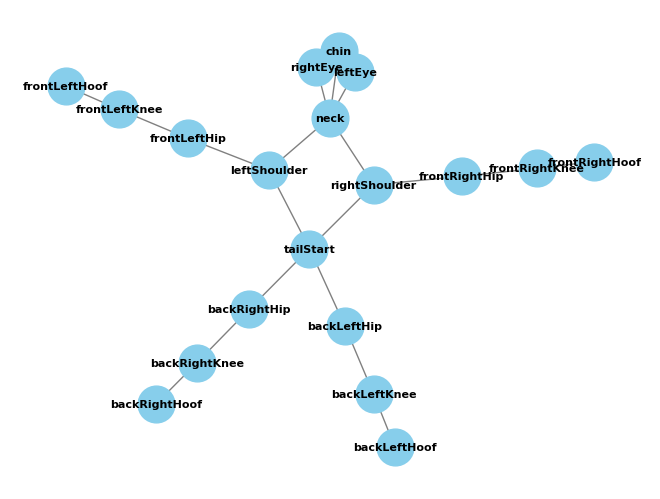

In [3]:
# Create a graph
graph_network = nx.Graph(graph)


# Draw the graph
# pos = nx.spring_layout(graph_network)  # You can choose a different layout algorithm
nx.draw(graph_network, with_labels=True, font_weight='bold', node_size=700, 
        node_color='skyblue', font_color='black', font_size=8, edge_color='gray')

# Display the graph
plt.show()


In [4]:
# save dictionary to JSON file
with open('behavoiur-discovery/graph.json', 'w') as fp:
    json.dump(graph, fp, indent=4)

Define rules to connect the nodes
1. Load the .mat files 
2. Create a graph for each frame and a queue for each file
3. Normalize the x,y coordinates

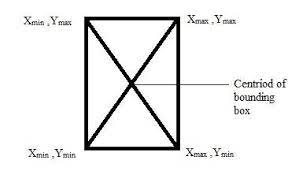

In [3]:
# get the graph for the landmarks data
graph_seq = graph_sequence()

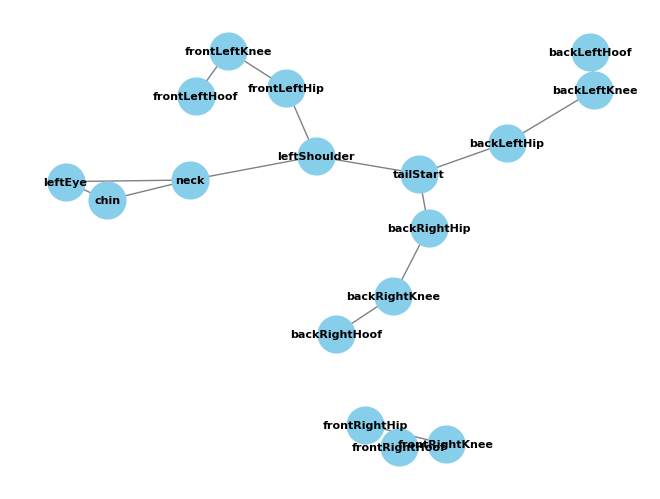

In [4]:
first_file_frame = graph_seq['100.mat'][33]
# draw the graph
# pos = nx.spring_layout(first_file_frame)
nx.draw(first_file_frame,  with_labels=True, font_weight='bold', node_size=700, 
        node_color='skyblue', font_color='black', font_size=8, edge_color='gray')

In [30]:
len(graph_seq['194.mat'])

399

Frame 197 has no nodes
Frame 198 has no nodes
Frame 197 has no nodes
Frame 198 has no nodes


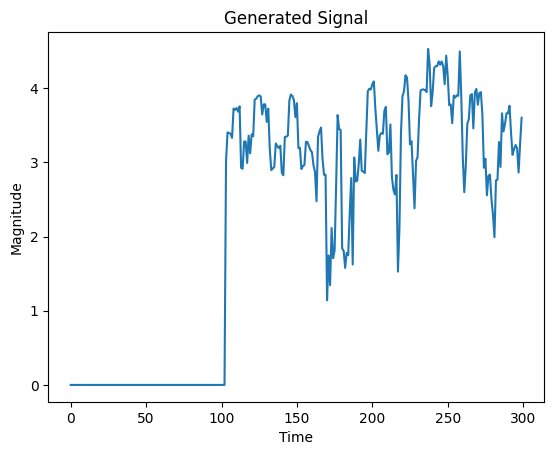

In [96]:
file_name = '732.mat'
padded_file = np.pad(adjacency_matrix(graph_seq[file_name]), ((abs(adjacency_matrix(graph_seq[file_name]).shape[0]-300), 0), (0, 0), (0, 0)))
# padded_file = np.array(padded_file)
# Generating a signal
signal = np.sum(padded_file, axis=(1, 2))  # Summing along the last two axes

# Plotting the signal
plt.plot(signal)
plt.title('Generated Signal')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()


304&306 <br>
474&485 <br>
547&549 <br>
595&598 (Different animals doing the same thing but different signals) <br>

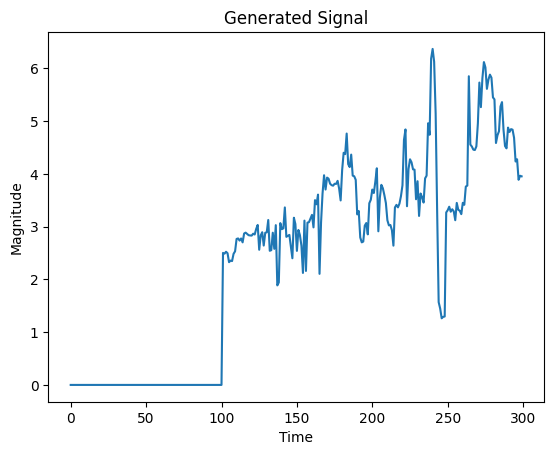

In [98]:
file_name = '736.mat'
padded_file = np.pad(adjacency_matrix(graph_seq[file_name]), ((abs(adjacency_matrix(graph_seq[file_name]).shape[0]-300), 0), (0, 0), (0, 0)))
# padded_file = np.array(padded_file)
# Generating a signal
signal = np.sum(padded_file, axis=(1, 2))  # Summing along the last two axes

# Plotting the signal
plt.plot(signal)
plt.title('Generated Signal')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()


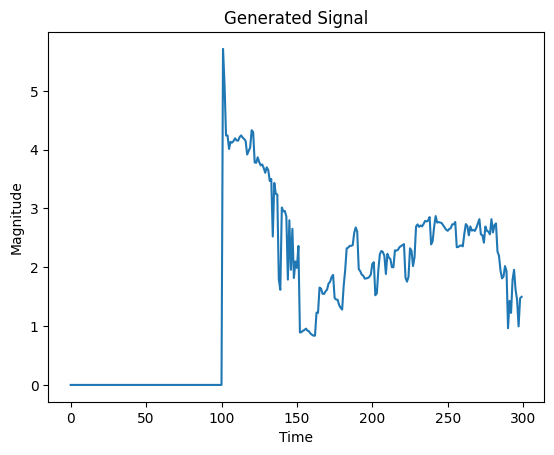

In [99]:
file_name = '734.mat'
padded_file = np.pad(adjacency_matrix(graph_seq[file_name]), ((abs(adjacency_matrix(graph_seq[file_name]).shape[0]-300), 0), (0, 0), (0, 0)))
# padded_file = np.array(padded_file)
# Generating a signal
signal = np.sum(padded_file, axis=(1, 2))  # Summing along the last two axes

# Plotting the signal
plt.plot(signal)
plt.title('Generated Signal')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()


Frame 197 has no nodes
Frame 198 has no nodes
Frame 197 has no nodes
Frame 198 has no nodes
Frame 198 has no nodes
Frame 199 has no nodes
Frame 200 has no nodes
Frame 201 has no nodes
Frame 202 has no nodes
Frame 203 has no nodes
Frame 198 has no nodes
Frame 199 has no nodes
Frame 200 has no nodes
Frame 201 has no nodes
Frame 202 has no nodes
Frame 203 has no nodes
Frame 173 has no nodes
Frame 174 has no nodes
Frame 175 has no nodes
Frame 176 has no nodes
Frame 177 has no nodes
Frame 178 has no nodes
Frame 179 has no nodes
Frame 180 has no nodes
Frame 181 has no nodes
Frame 182 has no nodes
Frame 183 has no nodes
Frame 184 has no nodes
Frame 185 has no nodes
Frame 186 has no nodes
Frame 187 has no nodes
Frame 188 has no nodes
Frame 189 has no nodes
Frame 173 has no nodes
Frame 174 has no nodes
Frame 175 has no nodes
Frame 176 has no nodes
Frame 177 has no nodes
Frame 178 has no nodes
Frame 179 has no nodes
Frame 180 has no nodes
Frame 181 has no nodes
Frame 182 has no nodes
Frame 183 h

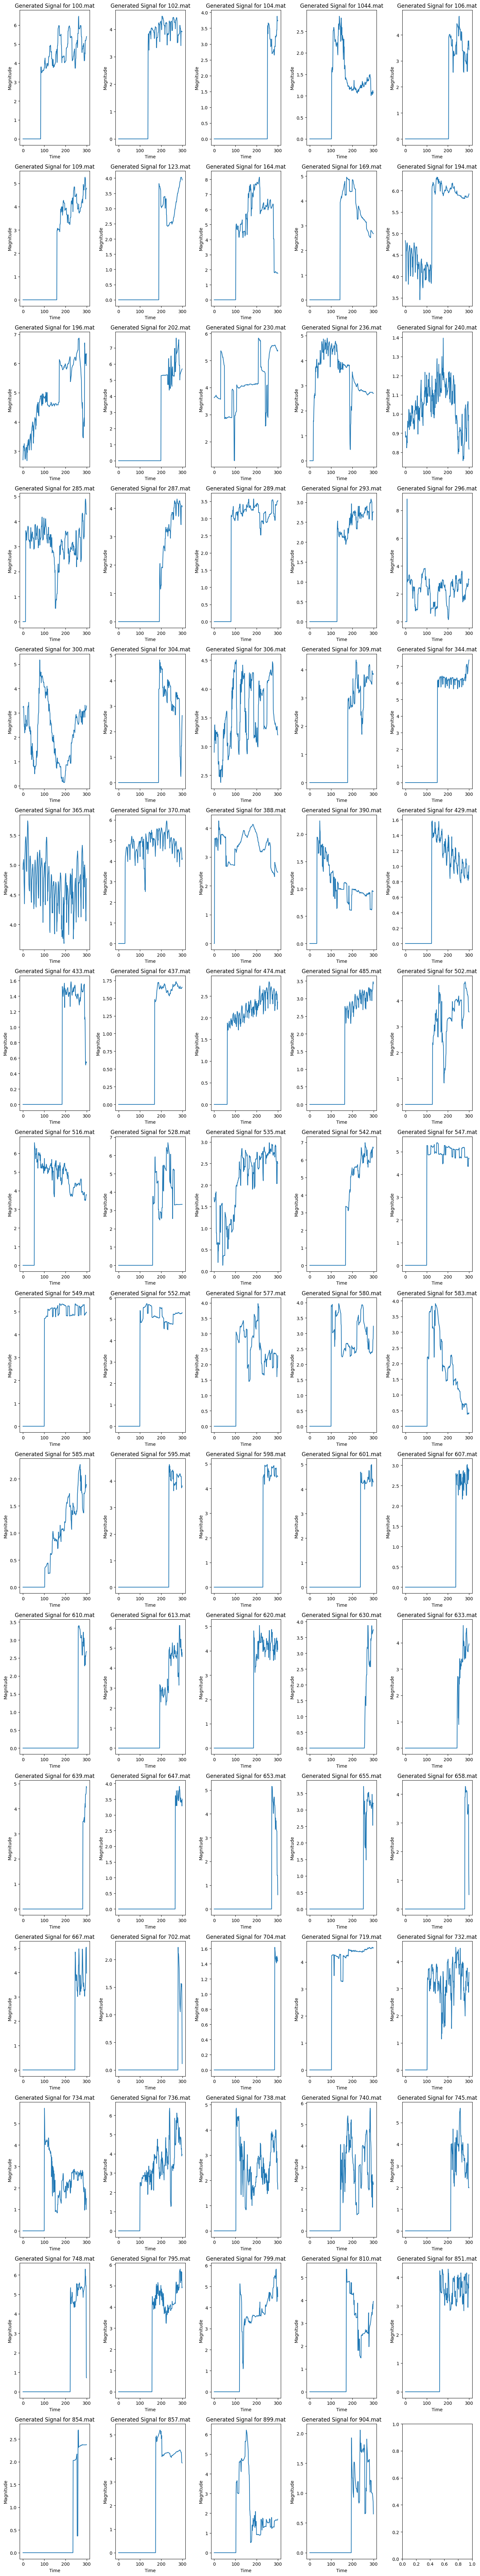

In [108]:
videos_dir = os.listdir('landmarks\horse')

# Calculate the number of rows and columns for the subplots
num_plots = len(videos_dir)
num_rows = (num_plots + 2) // 5
num_cols = min(num_plots, 5)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iterate over the files and plot the signals
for i, file_name in enumerate(videos_dir):
    if file_name != 'landmarks.m':
        # Calculate the subplot index
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        # Calculate the padded file and signal
        padded_file = np.pad(adjacency_matrix(graph_seq[file_name]), ((abs(adjacency_matrix(graph_seq[file_name]).shape[0]-300), 0), (0, 0), (0, 0)))
        signal = np.sum(padded_file, axis=(1, 2))
        
        # Plot the signal in the corresponding subplot
        if num_rows > 1:
            axes[row_idx, col_idx].plot(signal)
            axes[row_idx, col_idx].set_title(f'Generated Signal for {file_name}')
            axes[row_idx, col_idx].set_xlabel('Time')
            axes[row_idx, col_idx].set_ylabel('Magnitude')
        else:
            axes[col_idx].plot(signal)
            axes[col_idx].set_title(f'Generated Signal for {file_name}')
            axes[col_idx].set_xlabel('Time')
            axes[col_idx].set_ylabel('Magnitude')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


A way to check for leg movement.
Eliminating anything that does not conform to walking.<br>
Magnitude my not fully encapsulate the movement of the leg. <br>

In [ ]:
Video_data = []
for matr_val in graph_seq.values():
    # print(matr_val)
    Video_data.append(np.pad(adjacency_matrix(matr_val), 
                    ((abs(adjacency_matrix(matr_val).shape[0]-300), 0), (0, 0), (0, 0))))

    # print(adjacency_matrix(matr_val).shape)

In [ ]:
# samples = [adjacency_matrix(matr_val) for matr_val in graph_seq.values()]

for matr_val in graph_seq.values():
    # print(matr_val)
    print(adjacency_matrix(matr_val).shape)

    

In [22]:
print(nx.get_edge_attributes(first_file_frame, 'weight'))
nx.to_dict_of_lists(first_file_frame)

{('chin', 'leftEye'): 0.1610077085776241, ('chin', 'neck'): 0.160528509815673, ('leftEye', 'neck'): 0.08983253199808003, ('neck', 'leftShoulder'): 0.16518963589352464, ('leftShoulder', 'frontLeftHip'): 0.1304471295188597, ('leftShoulder', 'tailStart'): 0.2832949654903534, ('frontLeftHip', 'frontLeftKnee'): 0.16016165944266045, ('tailStart', 'backLeftHip'): 0.24024248916399063, ('tailStart', 'backRightHip'): 0.2592522706106538, ('frontLeftKnee', 'frontLeftHoof'): 0.12505174644464861, ('frontRightHip', 'frontRightKnee'): 0.1275108824923486, ('frontRightKnee', 'frontRightHoof'): 0.13697904071558742, ('backLeftHip', 'backLeftKnee'): 0.09926285552424832, ('backRightHip', 'backRightKnee'): 0.11093704801240632, ('backLeftKnee', 'backLeftHoof'): 0.2152706519702817, ('backRightKnee', 'backRightHoof'): 0.17185466288110296}


{'chin': ['leftEye', 'neck'],
 'leftEye': ['chin', 'neck'],
 'neck': ['chin', 'leftEye', 'leftShoulder'],
 'leftShoulder': ['neck', 'frontLeftHip', 'tailStart'],
 'frontLeftHip': ['leftShoulder', 'frontLeftKnee'],
 'tailStart': ['leftShoulder', 'backLeftHip', 'backRightHip'],
 'frontLeftKnee': ['frontLeftHip', 'frontLeftHoof'],
 'frontRightHip': ['frontRightKnee'],
 'frontRightKnee': ['frontRightHip', 'frontRightHoof'],
 'frontLeftHoof': ['frontLeftKnee'],
 'frontRightHoof': ['frontRightKnee'],
 'backLeftHip': ['tailStart', 'backLeftKnee'],
 'backRightHip': ['tailStart', 'backRightKnee'],
 'backLeftKnee': ['backLeftHip', 'backLeftHoof'],
 'backRightKnee': ['backRightHip', 'backRightHoof'],
 'backLeftHoof': ['backLeftKnee'],
 'backRightHoof': ['backRightKnee']}

In [29]:
print(adjacency_matrix(graph_seq['740.mat']).shape)
np.concatenate([arr for arr in adjacency_matrix(graph_seq['740.mat'])]).shape

Frame 147 has no nodes
Frame 148 has no nodes
Frame 149 has no nodes
Frame 150 has no nodes
Frame 151 has no nodes
Frame 152 has no nodes
Frame 153 has no nodes
Frame 163 has no nodes
Frame 164 has no nodes
(156, 17, 17)
Frame 147 has no nodes
Frame 148 has no nodes
Frame 149 has no nodes
Frame 150 has no nodes
Frame 151 has no nodes
Frame 152 has no nodes
Frame 153 has no nodes
Frame 163 has no nodes
Frame 164 has no nodes


(2652, 17)

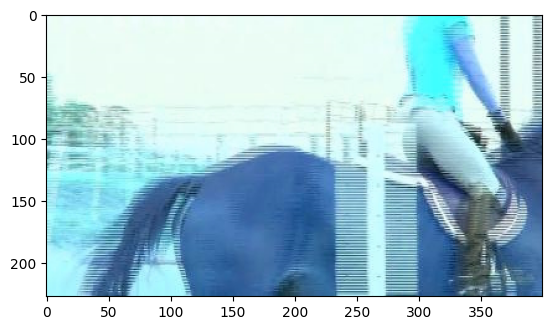

In [47]:
frame = evaluate_frame('videos/horse/740.avi', 164)

Frame 147 has no nodes
Frame 148 has no nodes
Frame 149 has no nodes
Frame 150 has no nodes
Frame 151 has no nodes
Frame 152 has no nodes
Frame 153 has no nodes
Frame 163 has no nodes
Frame 164 has no nodes


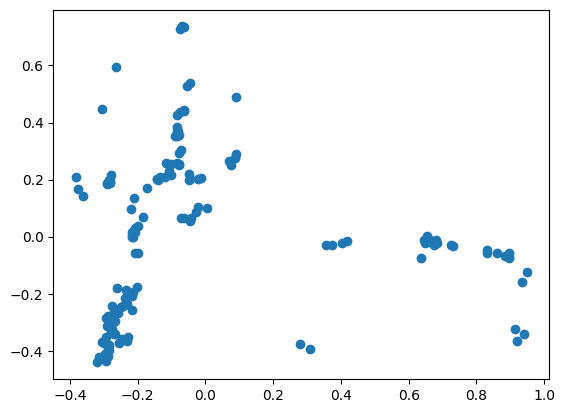

In [19]:
# reduce the dimensionality of the data
from sklearn.decomposition import PCA

# flatten the data
flatten_data = np.array([matrix.flatten() for matrix in adjacency_matrix(graph_seq['740.mat'])])

# reduce the dimensionality of the data
pca = PCA(n_components=2)
pca.fit(flatten_data)
pca_data = pca.transform(flatten_data)

# plot the data
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.show()

In [ ]:
# reduce the dimensionality of the data
from sklearn.decomposition import PCA
# flatten the data
reducted_data = dict()
for key, value in graph_seq.items():
    flatten_data = np.array([matrix.flatten() for matrix in adjacency_matrix(value)])
    pca = PCA(n_components=2)
    pca.fit(flatten_data)
    reducted_data[key] = pca.transform(flatten_data)
    

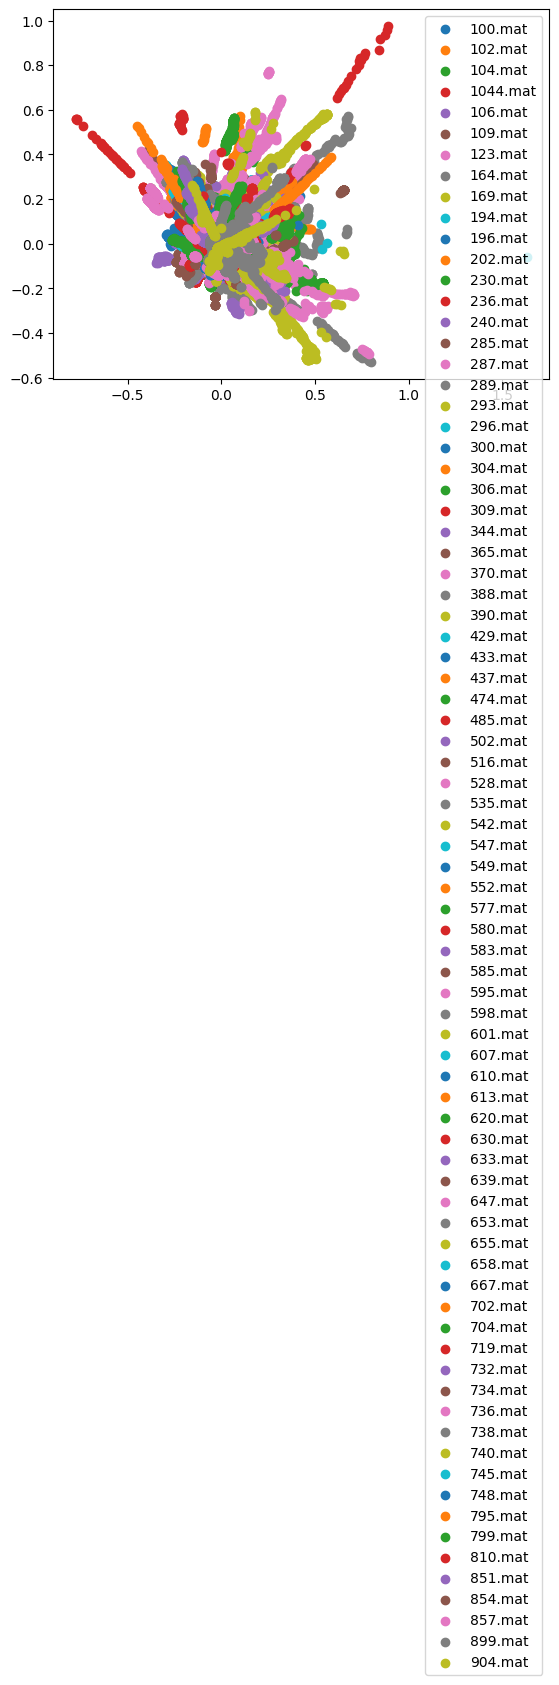

In [32]:
# plot the data
for key, value in reducted_data.items():
    plt.scatter(value[:, 0], value[:, 1], label=key)
plt.legend()

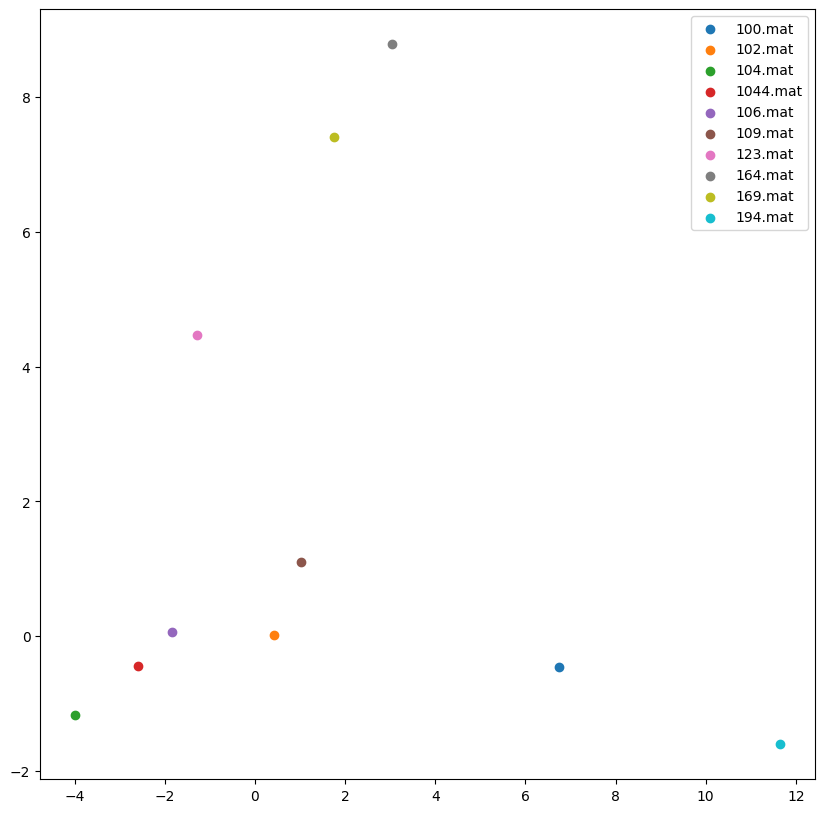

In [54]:
num_samples, num_channels, height, width = np.array(Video_data).shape
X = np.array(Video_data).reshape(num_samples, num_channels*height*width)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_dict = dict(zip(graph_seq.keys(), X_pca))

count = 0
# plot the PCA_dict
plt.figure(figsize=(10,10))
for key, value in pca_dict.items():
    if count == 10:
        break
    plt.scatter(value[0], value[1], label=key)
    count += 1
plt.legend()

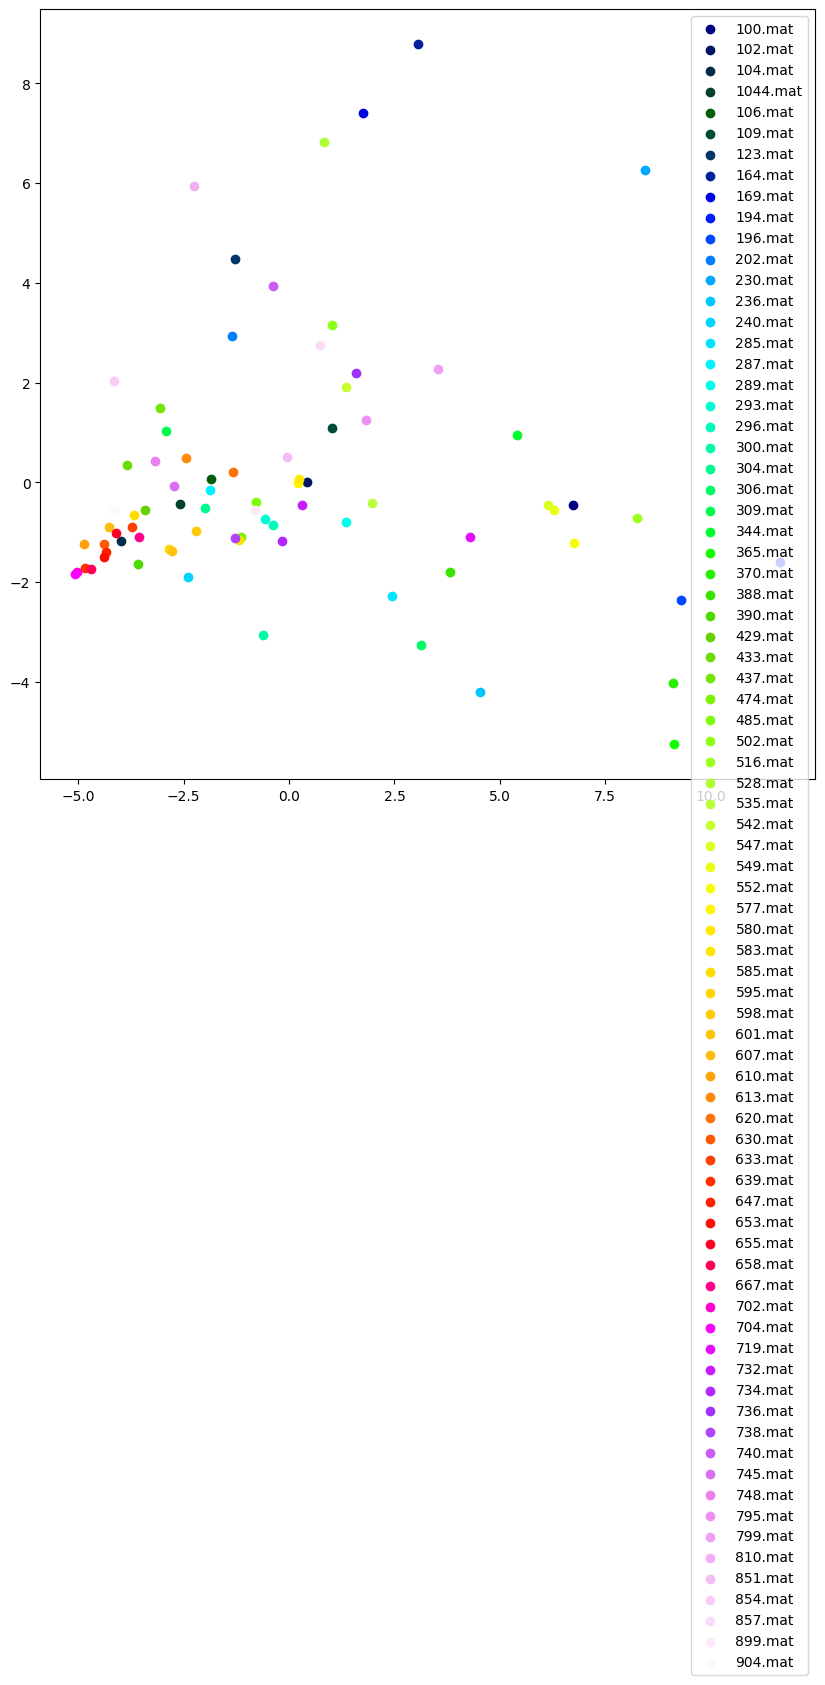

In [55]:
num_samples, num_channels, height, width = np.array(Video_data).shape
X = np.array(Video_data).reshape(num_samples, num_channels*height*width)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_dict = dict(zip(graph_seq.keys(), X_pca))

# Create a colormap
colors = cm.gist_ncar(np.linspace(0, 1, 79))

plt.figure(figsize=(10,10))
for count, (key, value) in enumerate(pca_dict.items()):
    if count == 80:
        break
    plt.scatter(value[0], value[1], label=key, color=colors[count])
plt.legend()

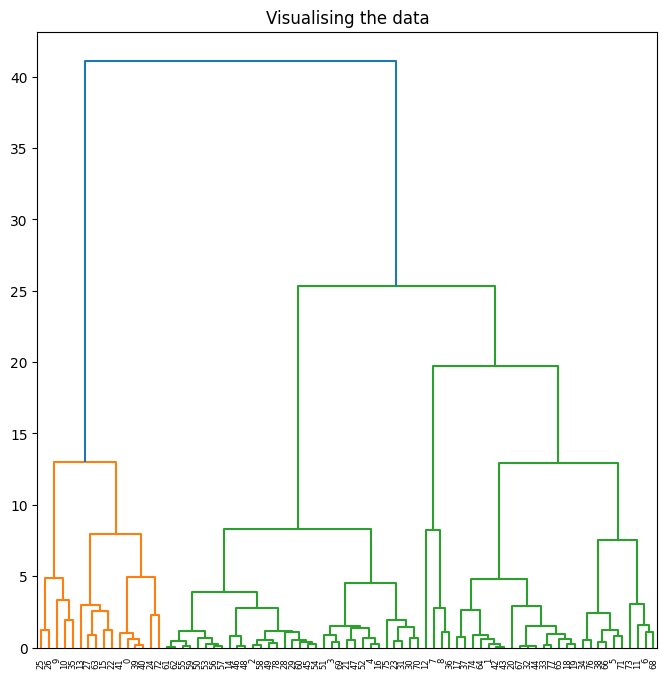

In [67]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(list(pca_dict.values()), method ='ward')))

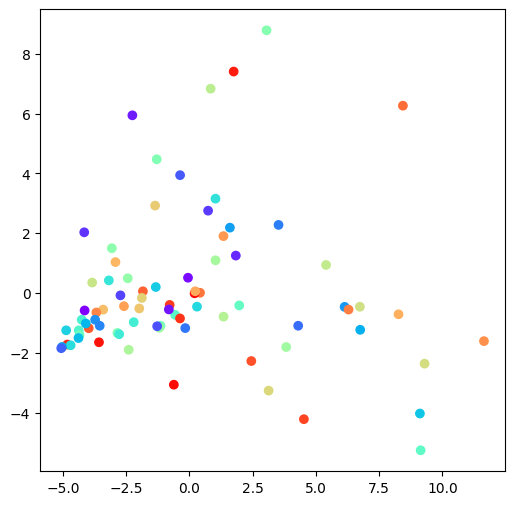

In [70]:
ac2 = AgglomerativeClustering(n_clusters = 79)

# Convert pca_dict values to numpy array
pca_dict_array = np.array(list(pca_dict.values()))

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(pca_dict_array[:, 0], pca_dict_array[:, 1], c = ac2.fit_predict(pca_dict_array), cmap ='rainbow')
plt.show()

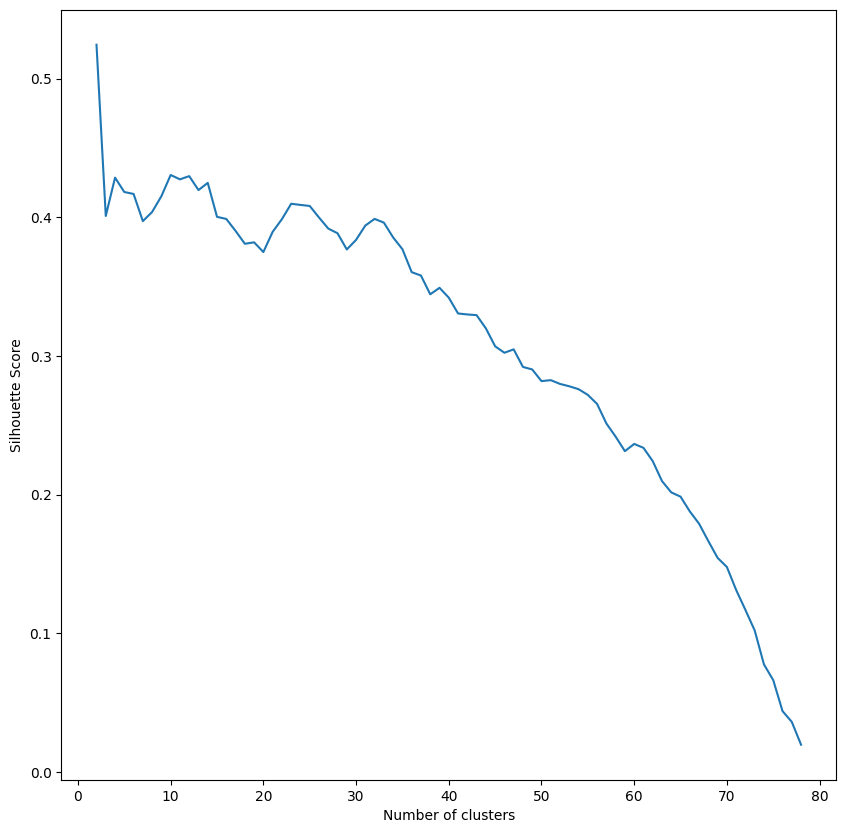

In [72]:
# compute the silhouette score for a range of 79 clusters
silhouette_scores = []
for n_cluster in range(2, 79):
    silhouette_scores.append(silhouette_score(pca_dict_array, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(pca_dict_array)))

# plot the silhouette scores
plt.figure(figsize=(10, 10))
plt.plot(range(2, 79), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Check the no of frames perhaps the cluster is due to sparse data

In [7]:
from node2vec import Node2Vec

# Assuming you have a graph 'G'
node2vec = Node2Vec(first_file_frame, dimensions=64, walk_length=30, num_walks=200, workers=4)


c:\Users\Austin\Desktop\Agent\animal-pose-estimation\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Computing transition probabilities: 100%|██████████| 14/14 [00:00<00:00, 7023.11it/s]


In [8]:
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)


In [9]:
# Get the embedding for a specific node (e.g., node '0')
model.wv['backRightHoof']


array([ 0.33325917,  0.00305918,  0.35420942,  0.2822716 ,  0.14413178,
        0.11148843,  0.03489264, -0.43204358, -0.46396285, -0.23460376,
        0.27224785, -0.30610737, -0.09946018,  0.0070683 , -0.25086308,
       -0.1417854 , -0.35386586, -0.24183908, -0.10103845,  0.00663463,
        0.16304545,  0.04432049,  0.41139328, -0.05132864, -0.03199434,
        0.29398254, -0.10273346, -0.07847615, -0.6098085 , -0.19501755,
        0.31567046, -0.1822066 , -0.427661  , -0.11750152,  0.157039  ,
        0.07107908, -0.21662726, -0.01639662,  0.03435345,  0.3276718 ,
        0.12707415,  0.05521111, -0.4020276 , -0.2941857 , -0.34959775,
       -0.42693782,  0.01902929, -0.28298616, -0.07230633, -0.05376903,
        0.15689644,  0.24004437,  0.0156197 ,  0.16942976,  0.23776223,
       -0.38671082,  0.1168103 , -0.28820586, -0.13287698,  0.2586206 ,
        0.32404107, -0.49215147,  0.24345814,  0.31283587], dtype=float32)